

Read in data in bb.csv. The fourth column contains a value that should be predicted based on three first column values.

Standardise the values (no need to split into training, validation and test sets), and then

* Create a regularised (use sum of weights squared regularisation) model to see the coefficient point estimates
* Create a Bayesian variant of the same model, compare the model parameter means to point estamates and report findings. Record also uncertainty of the parameters (the co-variance matrix sigma).
* Create a Bayesiam model by creating pymc model and sample from it. Use both Normal and Uniform priors for the parameters - are there any differences? Compare the statistics calculated from samples with the previous step and report findings.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pymc as pm
import scipy

from sklearn.linear_model import Ridge, BayesianRidge
from sklearn.preprocessing import StandardScaler

In [ ]:
# test
assert(bb_data.shape[0] == 41)
assert(bb_data.shape[1] == 4)

In [ ]:

scaler = StandardScaler().fit(x)
scaled_x = scaler.transform(x)

[ 0.11990405  0.7363293  -1.00333315]


In [ ]:
model_ridge = Ridge().fit(scaled_x,y)
print(model_ridge.coef_)

[ 0.11990405  0.7363293  -1.00333315]


In [ ]:
model_bayesianridge = BayesianRidge().fit(x,y)
print(model_bayesianridge.coef_)
print(model_bayesianridge.sigma_)

[ 0.10176011  0.65747146 -0.97926625]
[[ 0.00785608  0.00660199 -0.00329436]
 [ 0.00660199  0.05014773 -0.00186485]
 [-0.00329436 -0.00186485  0.01027956]]


In [ ]:
initial_model = pm.Model()

with initial_model:

    # Priors for unknown model parameters

    # Expected value of outcome
    mu = w0 + w1*x[:,0] + w2*x[:,1] + w3*x[:,2]

    # Likelihood (sampling distribution) of observations
    y_obs = pm.Normal("y_obs", mu=mu, observed=y)

    # draw posterior samples
    trace = pm.sample(3000, tune=2000)

/var/folders/02/xqlcb8cs6xl1pzfb6zvtw7180000gp/T/ipykernel_13519/1377658837.py:18: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(3000, tune=2000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [w3, w2, w1, w0]


Sampling 4 chains for 2_000 tune and 3_000 draw iterations (8_000 + 12_000 draws total) took 34 seconds.
The acceptance probability does not match the target. It is 0.9026289421558719, but should be close to 0.8. Try to increase the number of tuning steps.
There were 1175 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5774240760388694, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 10% for some parameters.


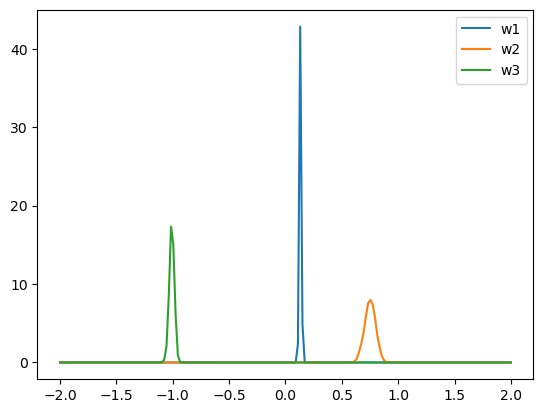

In [ ]:
xs = np.linspace(-2,2,200)

for w in ['w1', 'w2', 'w3']:

plt.legend()
plt.show()

Bayesian Ridge Regression offered a more nuanced understanding of the model’s confidence by producing distributions over coefficients. While the prediction accuracy was similar to Ridge, the added value of uncertainty estimation makes Bayesian methods valuable, especially when stakes are high or data is noisy.

